In [15]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
import pandas as pd

## test pca

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [4]:
newsgroups_train = fetch_20newsgroups(subset='train', 
                                      categories=['alt.atheism', 'sci.space'])
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
X = pipeline.fit_transform(newsgroups_train.data).todense()
X

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.04199996, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

(1073, 22464)


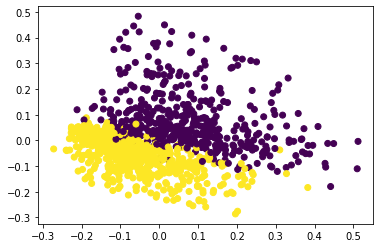

In [12]:
print(X.shape)
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
plt.scatter(data2D[:,0], data2D[:,1], c=newsgroups_train.target)

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(X)
centers2D = pca.transform(kmeans.cluster_centers_)
centers2D

array([[ 0.13844083, -0.00714742],
       [-0.08765812,  0.00452561]])

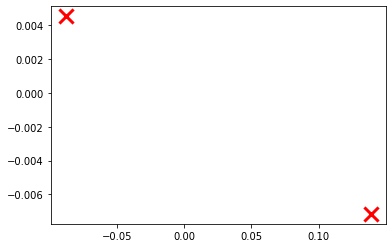

In [14]:
#plt.hold(True)
plt.scatter(centers2D[:,0], centers2D[:,1], 
            marker='x', s=200, linewidths=3, c='r')

## Similarity between venues
---

In [142]:
with open('data/data_venues_concerts_artists.csv', encoding='utf-8') as file:
    venues_concerts_artists_df = pd.read_csv(file, index_col=0)
    
with open('data/data_stats_venues_genres.csv', encoding='utf-8') as file:
    stats_venues_genres_df = pd.read_csv(file, index_col=0)

with open('data/data_stats_venues_features.csv', encoding='utf-8') as file:
    stats_venues_features_df = pd.read_csv(file, index_col=0)
    
with open('data/songkick/data_songkick_venues.csv', encoding='utf-8') as file:
    venues_df = pd.read_csv(file, index_col=0)
    
stats_venues_genres_df

,nbr_concerts,nbr_artists,acoustic music,art music,blues,children's music,country music,dance music,electronic music,experimental music,...,instrumental music,jazz,lo-fi music,pop music,rhythm and blues,rock music,soul music,underground music,vocal music,world music
/venues/1002631,2,1,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00
/venues/1004201,40,54,0.10,0.32,0.30,0.00,0.30,0.35,0.42,0.00,...,0.00,0.10,0.00,0.55,0.00,0.55,0.00,0.00,0.08,0.68
/venues/1004876,34,19,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.06,0.00,0.06,0.00,0.15,0.00,0.00,0.00,0.18
/venues/1004881,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
/venues/1004891,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/venues/988536,2,3,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50
/venues/993251,5,5,0.00,0.00,0.20,0.00,0.00,0.00,0.00,0.00,...,0.00,0.20,0.00,0.20,0.20,0.00,0.00,0.00,0.00,1.00
/venues/996001,2,2,0.00,0.00,0.00,0.00,0.00,0.50,0.50,0.00,...,0.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
/venues/996021,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [18]:
venues_artists_count = venues_concerts_artists_df.set_index(['venue_id', 'concert_id', 'artist_id']).groupby(level=['venue_id', 'artist_id']).size()
venues_artists_count.name = 'count'
venues_artists_count = venues_artists_count.reset_index()
venues_artists_count

,venue_id,artist_id,count
0,/venues/1002631,/artists/551106-trey-songz,2
1,/venues/1004201,/artists/10014839-marina-and-guitar,1
2,/venues/1004201,/artists/10014849-sahad-and-the-nataal-patchwork,1
3,/venues/1004201,/artists/1019510-bittuner,1
4,/venues/1004201,/artists/111256-boxer-rebellion,1
...,...,...,...
73493,/venues/993251,/artists/433191-patrice,1
73494,/venues/996001,/artists/1799731-hilaria-kramer,1
73495,/venues/996001,/artists/630965-kellerkind,1
73496,/venues/996021,/artists/561592-time-machine,1


In [19]:
venues_artists_occ = pd.pivot(venues_artists_count, index='artist_id', columns='venue_id').fillna(0)
venues_artists_occ

count  \
venue_id                                           /venues/1002631   
artist_id                                                            
/artists/10000324-arthur-hnatek-trio                          0.00   
/artists/10000349-martha-argerich-and-reencuentros            0.00   
/artists/10000554-highland-sanctuary                          0.00   
/artists/10001989-gallery-of-noise                            0.00   
/artists/10002074-san-joes                                    0.00   
...                                                            ...   
/artists/9997994-helene-barbier                               0.00   
/artists/9999029-ricky-and-sam                                0.00   
/artists/99991-jlive                                          0.00   
/artists/9999464-haednut                                      0.00   
/artists/9999849-duncan-laurence                              0.00   

                                                                    \
venue_id                                           /venues/1004201   
artist_id                                                            
/artists/10000324-arthur-hnatek-trio                          0.00   
/artists/10000349-martha-argerich-and-reencuentros            0.00   
/artists/10000554-highland-sanctuary                          0.00   
/artists/10001989-gallery-of-noise                            0.00   
/artists/10002074-san-joes                                    0.00   
...                                                            ...   
/artists/9997994-helene-barbier                               0.00   
/artists/9999029-ricky-and-sam                                0.00   
/artists/99991-jlive                                          0.00   
/artists/9999464-haednut                                      0.00   
/artists/9999849-duncan-laurence                              0.00   

                                                                    \
venue_id                                           /venues/1004876   
artist_id                                                            
/artists/10000324-arthur-hnatek-trio                          0.00   
/artists/10000349-martha-argerich-and-reencuentros            0.00   
/artists/10000554-highland-sanctuary                          0.00   
/artists/10001989-gallery-of-noise                            0.00   
/artists/10002074-san-joes                                    0.00   
...                                                            ...   
/artists/9997994-helene-barbier                               0.00   
/artists/9999029-ricky-and-sam                                0.00   
/artists/99991-jlive                                          0.00   
/artists/9999464-haednut                                      0.00   
/artists/9999849-duncan-laurence                              0.00   

                                                                    \
venue_id                                           /venues/1004881   
artist_id                                                            
/artists/10000324-arthur-hnatek-trio                          0.00   
/artists/10000349-martha-argerich-and-reencuentros            0.00   
/artists/10000554-highland-sanctuary                          0.00   
/artists/10001989-gallery-of-noise                            0.00   
/artists/10002074-san-joes                                    0.00   
...                                                            ...   
/artists/9997994-helene-barbier                               0.00   
/artists/9999029-ricky-and-sam                                0.00   
/artists/99991-jlive                                          0.00   
/artists/9999464-haednut                                      0.00   
/artists/9999849-duncan-laurence                              0.00   

                                                                    \
venue_id                                           /venues/1004891 

In [20]:
venues_artists_occ = venues_artists_occ.iloc[:, :].T.reset_index().drop(columns=['level_0']).set_index('venue_id')
venue_names = list(venues_artists_occ.index)
venues_artists_occ

artist_id,/artists/10000324-arthur-hnatek-trio,/artists/10000349-martha-argerich-and-reencuentros,/artists/10000554-highland-sanctuary,/artists/10001989-gallery-of-noise,/artists/10002074-san-joes,/artists/10003709-le-son-du-voisin,/artists/10003759-chansonniers-de-bottega,/artists/10004349-michelle,/artists/10004739-lepee,/artists/10005079-pillowism,...,/artists/9995244-dj-tecnic,/artists/9995954-can-bardd,/artists/99964-cidade-negra,/artists/9997819-septris,/artists/9997974-dust-of-soul,/artists/9997994-helene-barbier,/artists/9999029-ricky-and-sam,/artists/99991-jlive,/artists/9999464-haednut,/artists/9999849-duncan-laurence
venue_id,,,,,,,,,,,,,,,,,,,,,
/venues/1002631,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
/venues/1004201,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
/venues/1004876,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
/venues/1004881,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
/venues/1004891,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/venues/988536,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
/venues/993251,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
/venues/996001,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [93]:
def filter_data(df, nbr_artists):
    filtered_df = df.loc[df['nbr_artists'] > nbr_artists]
    return filtered_df

In [155]:
filtered_genres_df = filter_data(stats_venues_genres_df, 100)
filtered_genres_df = filtered_genres_df.drop(columns=['nbr_artists', 'nbr_concerts'])
venue_names = list(filtered_genres_df.index)
filtered_genres_df

,acoustic music,art music,blues,children's music,country music,dance music,electronic music,experimental music,folk music,functional music,...,instrumental music,jazz,lo-fi music,pop music,rhythm and blues,rock music,soul music,underground music,vocal music,world music
/venues/101173,0.03,0.06,0.04,0.00,0.02,0.18,0.28,0.13,0.05,0.01,...,0.02,0.05,0.00,0.18,0.02,0.46,0.01,0.02,0.03,0.42
/venues/1129916,0.02,0.08,0.02,0.00,0.01,0.23,0.24,0.10,0.08,0.00,...,0.04,0.04,0.00,0.07,0.03,0.39,0.00,0.00,0.02,0.38
/venues/1129971,0.08,0.11,0.04,0.00,0.01,0.22,0.24,0.09,0.07,0.03,...,0.02,0.03,0.00,0.34,0.01,0.61,0.01,0.02,0.06,0.45
/venues/1138086,0.09,0.12,0.02,0.00,0.02,0.13,0.19,0.03,0.07,0.02,...,0.01,0.00,0.01,0.37,0.05,0.50,0.04,0.01,0.08,0.32
/venues/114785,0.13,0.09,0.05,0.00,0.07,0.05,0.07,0.01,0.24,0.00,...,0.01,0.11,0.00,0.56,0.05,0.32,0.05,0.00,0.15,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/venues/93725,0.03,0.02,0.01,0.00,0.00,0.21,0.23,0.05,0.03,0.01,...,0.00,0.01,0.00,0.09,0.01,0.30,0.00,0.01,0.04,0.34
/venues/938331,0.00,0.01,0.00,0.00,0.00,0.75,0.76,0.19,0.00,0.01,...,0.00,0.00,0.00,0.04,0.00,0.03,0.00,0.00,0.00,0.09
/venues/96464,0.07,0.05,0.00,0.00,0.00,0.09,0.16,0.03,0.17,0.01,...,0.00,0.06,0.00,0.27,0.04,0.39,0.02,0.02,0.03,0.48
/venues/96586,0.06,0.15,0.01,0.00,0.02,0.08,0.25,0.21,0.19,0.00,...,0.01,0.03,0.00,0.10,0.01,0.35,0.00,0.00,0.06,0.30


In [151]:
filtered_features_df = filter_data(stats_venues_features_df, 100)
filtered_features_df = filtered_features_df.drop(columns=['nbr_artists'])
venue_names = list(filtered_features_df.index)
filtered_features_df = filtered_features_df[['listeners_median', 'followers_median']]
filtered_features_df = filtered_features_df.merge(filtered_genres_df['dance music'], left_index=True, right_index=True)
filtered_features_df = (filtered_features_df-filtered_features_df.mean())/filtered_features_df.std()
filtered_features_df

,listeners_median,followers_median,dance music
venue_id,,,
/venues/101173,-0.33,-0.32,0.27
/venues/1129916,-0.39,-0.36,0.58
/venues/1129971,1.52,1.92,0.52
/venues/1138086,-0.01,-0.06,-0.05
/venues/114785,0.83,0.75,-0.56
...,...,...,...
/venues/93725,-0.39,-0.37,0.46
/venues/938331,-0.32,-0.33,3.88
/venues/96464,-0.36,-0.34,-0.30


In [156]:
num_clusters = 10
km = KMeans(n_clusters=num_clusters)

%time km.fit(filtered_genres_df)

clusters = km.labels_.tolist()

Wall time: 112 ms


In [157]:
cluster_df = pd.DataFrame({'cluster': clusters}, index=venue_names).merge(venues_df['venue'], left_index=True, right_index=True)
cluster_df['cluster'].value_counts()

for x in range(10):
    venues_list = sorted(cluster_df.loc[cluster_df['cluster'] == x]['venue'])
    print('Cluster', x)
    for venue in venues_list:
        print('  ', venue)
    print('---------------------')

Cluster 0
   Abart
   Amalgame Club
   Bad Bonn
   Bogen F
   Dynamo
   Ebullition
   Eldorado
   Fri-Son
   ISC Club
   KiFF
   Komplex 457
   Komplex Klub
   L'Usine
   Le Pont Rouge
   Le Port Franc
   Le Romandie
   Les Docks
   Mascotte
   Palace
   Plaza
   Rocking Chair
   Rote Fabrik
   Südpol
   Treibhaus
---------------------
Cluster 1
   Alhambra
   Arena de Genève
   Auditorium Stravinski
   Grand Casino
   Kaufleuten
   Kongresshaus Zürich
   Messe Basel
   Papiersaal
   Samsung Hall Zürich
   Théâtre du Léman
   Volkshaus
   Volkshaus
---------------------
Cluster 2
   Borderline Club
   D Club
   Hive
   Le Zoo
   Nordstern
---------------------
Cluster 3
   Albani
   Bierhübeli
   Cafe Mokka
   Galvanik
   Gare de Lion
   Grabenhalle
   Helsinki
   Kulturfabrik (KUFA) Lyss
   Kulturfabrik Kofmehl
   Kulturzentrum Kammgarn
   Kuppel
   Old Capitol
   Royal
   Salzhaus
   Schüür
   Selig
   Sommercasino
   Usine à Gaz
   Werkk Kulturlokal
---------------------
Cluster 4
 

In [12]:
transformer = TfidfTransformer(smooth_idf=False)
tfidf_matrix = transformer.fit_transform(venues_artists_filtered)
tfidf_matrix.toarray()

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.43039728e-05, 4.53157306e-05, 5.73948697e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.06235665e-05, 1.38583543e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.36816728e-05, 1.06282520e-04, 7.21139289e-04],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.82887040e-04, 1.52616087e-04, 2.20910495e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.40872840e-04, 1.05324798e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.61479489e-04, 2.04950759e-03]])

In [60]:
#cosine_similarity(venues_artists_occ[['/venues/30935', '/venues/35054']]
similarity_matrix = pd.DataFrame(cosine_similarity(filtered_df))
similarity_matrix.index = venue_names
similarity_matrix.columns = venue_names
similarity_matrix

,/venues/101173,/venues/1129916,/venues/1129971,/venues/1138086,/venues/114785,/venues/1161281,/venues/120770,/venues/121743,/venues/121833,/venues/1267811,...,/venues/842001,/venues/86235,/venues/898101,/venues/924806,/venues/934791,/venues/93725,/venues/938331,/venues/96464,/venues/96586,/venues/98757
/venues/101173,1.00,0.96,0.98,0.92,0.73,0.92,0.84,0.98,0.95,0.91,...,0.87,0.82,0.94,0.89,0.48,0.98,0.50,0.92,0.91,0.67
/venues/1129916,0.96,1.00,0.92,0.85,0.67,0.88,0.80,0.92,0.90,0.89,...,0.86,0.80,0.88,0.83,0.56,0.97,0.58,0.87,0.91,0.65
/venues/1129971,0.98,0.92,1.00,0.98,0.81,0.92,0.83,0.97,0.95,0.93,...,0.89,0.86,0.93,0.87,0.41,0.94,0.42,0.94,0.89,0.72
/venues/1138086,0.92,0.85,0.98,1.00,0.86,0.91,0.80,0.91,0.95,0.90,...,0.86,0.87,0.89,0.81,0.36,0.87,0.35,0.94,0.86,0.75
/venues/114785,0.73,0.67,0.81,0.86,1.00,0.87,0.68,0.71,0.76,0.68,...,0.67,0.83,0.78,0.66,0.19,0.67,0.18,0.83,0.71,0.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/venues/93725,0.98,0.97,0.94,0.87,0.67,0.88,0.87,0.93,0.91,0.86,...,0.80,0.76,0.92,0.85,0.59,1.00,0.61,0.89,0.87,0.63
/venues/938331,0.50,0.58,0.42,0.35,0.18,0.36,0.74,0.35,0.49,0.25,...,0.28,0.12,0.28,0.15,0.99,0.61,1.00,0.31,0.47,0.13
/venues/96464,0.92,0.87,0.94,0.94,0.83,0.97,0.74,0.90,0.92,0.85,...,0.80,0.91,0.94,0.90,0.30,0.89,0.31,1.00,0.89,0.84
/venues/96586,0.91,0.91,0.89,0.86,0.71,0.89,0.68,0.88,0.95,0.84,...,0.89,0.84,0.84,0.79,0.42,0.87,0.47,0.89,1.00,0.69


In [62]:
#'/venues/35054'
venue_id = '/venues/35054'
similar_venues = similarity_matrix[venue_id].nlargest(20)
pd.DataFrame(similar_venues).merge(venues_df['venue'], left_index=True, right_index=True)

,/venues/35054,venue
/venues/35054,1.00,Les Docks
/venues/33498,0.99,Fri-Son
/venues/1129971,0.98,Komplex 457
/venues/1138086,0.98,Plaza
/venues/31959,0.98,Bad Bonn
/venues/2837343,0.98,Le Romandie
/venues/419106,0.98,Amalgame Club
/venues/49813,0.98,X-TRA
/venues/52528,0.97,Rocking Chair
/venues/4233269,0.97,Le Pont Rouge


## Classifier for tracks features
---

In [2]:
with open('data/spotify/data_spotify_tracks.csv', encoding='utf-8') as tracks_file:
    tracks_df = pd.read_csv(tracks_file, index_col=0)
    
tracks_df

,track_name,spotify_name,spotify_id,artist_id,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature
2UjEyfnKzaY7qpBEeESJjv,Even When The Water's Cold,!!!,1mmehjf7eHA10uHMisZGJg,/artists/3684861-chk-chk-chk,48,0.71,0.83,2.00,-6.85,0.00,0.04,0.11,0.00,0.16,0.87,104.97,audio_features,227067.00,4.00
7y8aVfDkqt6qirGNivvs0M,One Girl / One Boy,!!!,1mmehjf7eHA10uHMisZGJg,/artists/3684861-chk-chk-chk,45,0.70,0.85,10.00,-5.75,0.00,0.04,0.00,0.00,0.32,0.87,117.00,audio_features,243627.00,4.00
2PAn8J9dbmSnR4fLjpgehC,Dancing Is The Best Revenge,!!!,1mmehjf7eHA10uHMisZGJg,/artists/3684861-chk-chk-chk,42,0.86,0.76,1.00,-6.33,1.00,0.05,0.00,0.31,0.06,0.80,120.01,audio_features,281558.00,4.00
7pyARdcnQELUIS2kcKOlhz,Fast Car,!!!,1mmehjf7eHA10uHMisZGJg,/artists/3684861-chk-chk-chk,41,0.73,0.91,1.00,-6.49,1.00,0.09,0.00,0.01,0.15,0.76,125.00,audio_features,243839.00,4.00
0BjOgTLP0kLC88XqMoyrv8,Slyd,!!!,1mmehjf7eHA10uHMisZGJg,/artists/3684861-chk-chk-chk,39,0.86,0.72,0.00,-8.73,1.00,0.10,0.06,0.24,0.22,0.58,120.00,audio_features,254920.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2TU6JSgRLKgks1ydHdPQpC,Wheels in Motion,Heymoonshaker,1ar2o79WFRJbq4lci6jq55,/artists/5427898-heymoonshaker,16,0.81,0.38,2.00,-9.40,1.00,0.06,0.53,0.01,0.09,0.32,91.96,audio_features,200844.00,4.00
66lXofi3mf385buHSMiKZN,Find Myself a Home,Heymoonshaker,1ar2o79WFRJbq4lci6jq55,/artists/5427898-heymoonshaker,15,0.74,0.64,11.00,-9.48,0.00,0.06,0.54,0.00,0.08,0.11,120.50,audio_features,236453.00,4.00
5Fl64Ztk3D90gTQbdhZqj0,Devil in Mind,Heymoonshaker,1ar2o79WFRJbq4lci6jq55,/artists/5427898-heymoonshaker,12,0.70,0.59,1.00,-9.31,0.00,0.12,0.01,0.48,0.11,0.57,75.86,audio_features,271440.00,4.00
1JA12esXthNQiikiQDmbrv,Coz I Luv U,Heymoonshaker,1ar2o79WFRJbq4lci6jq55,/artists/5427898-heymoonshaker,12,0.75,0.71,2.00,-6.56,0.00,0.11,0.52,0.00,0.12,0.52,134.15,audio_features,184477.00,4.00


In [22]:
data = load_breast_cancer()
tracks_df['track_popularity'] = tracks_df['track_popularity'].astype('float64')
tracks_df

,track_name,spotify_name,spotify_id,artist_id,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature
2UjEyfnKzaY7qpBEeESJjv,Even When The Water's Cold,!!!,1mmehjf7eHA10uHMisZGJg,/artists/3684861-chk-chk-chk,48.00,0.71,0.83,2.00,-6.85,0.00,0.04,0.11,0.00,0.16,0.87,104.97,audio_features,227067.00,4.00
7y8aVfDkqt6qirGNivvs0M,One Girl / One Boy,!!!,1mmehjf7eHA10uHMisZGJg,/artists/3684861-chk-chk-chk,45.00,0.70,0.85,10.00,-5.75,0.00,0.04,0.00,0.00,0.32,0.87,117.00,audio_features,243627.00,4.00
2PAn8J9dbmSnR4fLjpgehC,Dancing Is The Best Revenge,!!!,1mmehjf7eHA10uHMisZGJg,/artists/3684861-chk-chk-chk,42.00,0.86,0.76,1.00,-6.33,1.00,0.05,0.00,0.31,0.06,0.80,120.01,audio_features,281558.00,4.00
7pyARdcnQELUIS2kcKOlhz,Fast Car,!!!,1mmehjf7eHA10uHMisZGJg,/artists/3684861-chk-chk-chk,41.00,0.73,0.91,1.00,-6.49,1.00,0.09,0.00,0.01,0.15,0.76,125.00,audio_features,243839.00,4.00
0BjOgTLP0kLC88XqMoyrv8,Slyd,!!!,1mmehjf7eHA10uHMisZGJg,/artists/3684861-chk-chk-chk,39.00,0.86,0.72,0.00,-8.73,1.00,0.10,0.06,0.24,0.22,0.58,120.00,audio_features,254920.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2TU6JSgRLKgks1ydHdPQpC,Wheels in Motion,Heymoonshaker,1ar2o79WFRJbq4lci6jq55,/artists/5427898-heymoonshaker,16.00,0.81,0.38,2.00,-9.40,1.00,0.06,0.53,0.01,0.09,0.32,91.96,audio_features,200844.00,4.00
66lXofi3mf385buHSMiKZN,Find Myself a Home,Heymoonshaker,1ar2o79WFRJbq4lci6jq55,/artists/5427898-heymoonshaker,15.00,0.74,0.64,11.00,-9.48,0.00,0.06,0.54,0.00,0.08,0.11,120.50,audio_features,236453.00,4.00
5Fl64Ztk3D90gTQbdhZqj0,Devil in Mind,Heymoonshaker,1ar2o79WFRJbq4lci6jq55,/artists/5427898-heymoonshaker,12.00,0.70,0.59,1.00,-9.31,0.00,0.12,0.01,0.48,0.11,0.57,75.86,audio_features,271440.00,4.00
1JA12esXthNQiikiQDmbrv,Coz I Luv U,Heymoonshaker,1ar2o79WFRJbq4lci6jq55,/artists/5427898-heymoonshaker,12.00,0.75,0.71,2.00,-6.56,0.00,0.11,0.52,0.00,0.12,0.52,134.15,audio_features,184477.00,4.00


In [23]:
tracks_features_df = tracks_df.drop(columns=['track_name', 'spotify_name', 'spotify_id', 'artist_id', 'energy', 'type'])
tracks_features_df

,track_popularity,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
2UjEyfnKzaY7qpBEeESJjv,48.00,0.71,2.00,-6.85,0.00,0.04,0.11,0.00,0.16,0.87,104.97,227067.00,4.00
7y8aVfDkqt6qirGNivvs0M,45.00,0.70,10.00,-5.75,0.00,0.04,0.00,0.00,0.32,0.87,117.00,243627.00,4.00
2PAn8J9dbmSnR4fLjpgehC,42.00,0.86,1.00,-6.33,1.00,0.05,0.00,0.31,0.06,0.80,120.01,281558.00,4.00
7pyARdcnQELUIS2kcKOlhz,41.00,0.73,1.00,-6.49,1.00,0.09,0.00,0.01,0.15,0.76,125.00,243839.00,4.00
0BjOgTLP0kLC88XqMoyrv8,39.00,0.86,0.00,-8.73,1.00,0.10,0.06,0.24,0.22,0.58,120.00,254920.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2TU6JSgRLKgks1ydHdPQpC,16.00,0.81,2.00,-9.40,1.00,0.06,0.53,0.01,0.09,0.32,91.96,200844.00,4.00
66lXofi3mf385buHSMiKZN,15.00,0.74,11.00,-9.48,0.00,0.06,0.54,0.00,0.08,0.11,120.50,236453.00,4.00
5Fl64Ztk3D90gTQbdhZqj0,12.00,0.70,1.00,-9.31,0.00,0.12,0.01,0.48,0.11,0.57,75.86,271440.00,4.00
1JA12esXthNQiikiQDmbrv,12.00,0.75,2.00,-6.56,0.00,0.11,0.52,0.00,0.12,0.52,134.15,184477.00,4.00


In [24]:
tracks_target_df = tracks_df[['energy']]
tracks_target_df

,track_popularity
2UjEyfnKzaY7qpBEeESJjv,48.00
7y8aVfDkqt6qirGNivvs0M,45.00
2PAn8J9dbmSnR4fLjpgehC,42.00
7pyARdcnQELUIS2kcKOlhz,41.00
0BjOgTLP0kLC88XqMoyrv8,39.00
...,...
2TU6JSgRLKgks1ydHdPQpC,16.00
66lXofi3mf385buHSMiKZN,15.00
5Fl64Ztk3D90gTQbdhZqj0,12.00
1JA12esXthNQiikiQDmbrv,12.00


In [13]:
X = tracks_features_df.iloc[:100]
y = tracks_target_df.iloc[:100]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)
X_train

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
4dZYyd374Y2EkkWJvQKXFF,0.67,0.57,9.00,-11.21,0.00,0.04,0.04,0.82,0.15,0.30,124.95,450493.00,4.00
7dpMgO106bOyevswpMKXgc,0.59,0.49,8.00,-8.91,1.00,0.05,0.22,0.13,0.40,0.62,121.16,576587.00,4.00
2d0xdgxOQuCxX6G3IAFEqZ,0.29,0.61,2.00,-9.73,1.00,0.03,0.01,0.12,0.10,0.33,117.01,307221.00,4.00
2PkH9wH2ohR0wofh46O2yX,0.85,0.60,2.00,-8.54,1.00,0.08,0.06,0.00,0.12,0.33,100.02,252000.00,4.00
4knd2gQyr2DTRLfJDHcyMS,0.81,0.47,9.00,-9.49,0.00,0.08,0.00,0.85,0.12,0.72,120.00,296500.00,4.00
15EH2glphTjcarRjAsc0EB,0.85,0.62,9.00,-5.78,1.00,0.11,0.03,0.00,0.10,0.11,135.96,255023.00,4.00
7ImmstssLRlB4MjmtWEEOn,0.31,0.87,2.00,-3.92,0.00,0.06,0.05,0.00,0.15,0.10,170.00,288280.00,4.00
0fUWBqpKPcF1JCiQdyMERv,0.86,0.32,7.00,-18.17,1.00,0.41,0.11,0.00,0.09,0.41,72.02,233333.00,4.00
33gGH1dN1dfG782dZh6RY1,0.66,0.55,4.00,-9.25,0.00,0.21,0.24,0.00,0.30,0.65,176.02,226441.00,4.00
6xGBZUMxfWdIAfG8PzfehQ,0.62,0.38,4.00,-8.25,1.00,0.03,0.82,0.00,0.05,0.17,116.05,311952.00,3.00


In [14]:
clf = LazyClassifier(verbose=1,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

models

 14%|█▍        | 4/29 [00:00<00:01, 12.91it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.38, 'Balanced Accuracy': 0.0347985347985348, 'ROC AUC': None, 'F1 Score': 0.26163934426229507, 'Time taken': 0.14099740982055664}
{'Model': 'BaggingClassifier', 'Accuracy': 0.28, 'Balanced Accuracy': 0.06227106227106227, 'ROC AUC': None, 'F1 Score': 0.24567375886524823, 'Time taken': 0.055999755859375}
{'Model': 'BernoulliNB', 'Accuracy': 0.3, 'Balanced Accuracy': 0.027472527472527472, 'ROC AUC': None, 'F1 Score': 0.27391304347826084, 'Time taken': 0.019001007080078125}
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.4, 'Balanced Accuracy': 0.036630036630036625, 'ROC AUC': None, 'F1 Score': 0.24347826086956517, 'Time taken': 0.11199688911437988}


 31%|███       | 9/29 [00:00<00:01, 17.42it/s]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.2, 'Balanced Accuracy': 0.054945054945054944, 'ROC AUC': None, 'F1 Score': 0.24909090909090906, 'Time taken': 0.017995595932006836}
{'Model': 'DummyClassifier', 'Accuracy': 0.18, 'Balanced Accuracy': 0.016483516483516484, 'ROC AUC': None, 'F1 Score': 0.17181818181818184, 'Time taken': 0.017000198364257812}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.14, 'Balanced Accuracy': 0.01282051282051282, 'ROC AUC': None, 'F1 Score': 0.168, 'Time taken': 0.018000125885009766}
{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.38, 'Balanced Accuracy': 0.07142857142857142, 'ROC AUC': None, 'F1 Score': 0.28824242424242424, 'Time taken': 0.16900134086608887}


 52%|█████▏    | 15/29 [00:00<00:00, 26.62it/s]

{'Model': 'GaussianNB', 'Accuracy': 0.42, 'Balanced Accuracy': 0.038461538461538464, 'ROC AUC': None, 'F1 Score': 0.252, 'Time taken': 0.019990205764770508}
{'Model': 'KNeighborsClassifier', 'Accuracy': 0.36, 'Balanced Accuracy': 0.03296703296703297, 'ROC AUC': None, 'F1 Score': 0.27490909090909094, 'Time taken': 0.021003007888793945}
{'Model': 'LabelPropagation', 'Accuracy': 0.2, 'Balanced Accuracy': 0.054945054945054944, 'ROC AUC': None, 'F1 Score': 0.2356862745098039, 'Time taken': 0.0169985294342041}
{'Model': 'LabelSpreading', 'Accuracy': 0.2, 'Balanced Accuracy': 0.054945054945054944, 'ROC AUC': None, 'F1 Score': 0.2356862745098039, 'Time taken': 0.01699662208557129}
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.1, 'Balanced Accuracy': 0.045787545787545784, 'ROC AUC': None, 'F1 Score': 0.1150537634408602, 'Time taken': 0.01699542999267578}
{'Model': 'LinearSVC', 'Accuracy': 0.26, 'Balanced Accuracy': 0.06043956043956044, 'ROC AUC': None, 'F1 Score': 0.2924324324324324, 'T

 66%|██████▌   | 19/29 [00:00<00:00, 29.54it/s]

{'Model': 'Perceptron', 'Accuracy': 0.26, 'Balanced Accuracy': 0.06043956043956044, 'ROC AUC': None, 'F1 Score': 0.29333333333333333, 'Time taken': 0.033997535705566406}


 79%|███████▉  | 23/29 [00:01<00:00, 20.94it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.38, 'Balanced Accuracy': 0.10805860805860805, 'ROC AUC': None, 'F1 Score': 0.30794871794871786, 'Time taken': 0.2389984130859375}
{'Model': 'RidgeClassifier', 'Accuracy': 0.36, 'Balanced Accuracy': 0.0695970695970696, 'ROC AUC': None, 'F1 Score': 0.2796363636363636, 'Time taken': 0.022000551223754883}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.36, 'Balanced Accuracy': 0.03296703296703297, 'ROC AUC': None, 'F1 Score': 0.2562711864406779, 'Time taken': 0.02300119400024414}
{'Model': 'SGDClassifier', 'Accuracy': 0.24, 'Balanced Accuracy': 0.05860805860805861, 'ROC AUC': None, 'F1 Score': 0.26972972972972975, 'Time taken': 0.03399944305419922}
{'Model': 'SVC', 'Accuracy': 0.42, 'Balanced Accuracy': 0.038461538461538464, 'ROC AUC': None, 'F1 Score': 0.24845070422535212, 'Time taken': 0.021012306213378906}


 97%|█████████▋| 28/29 [00:01<00:00, 18.44it/s]

{'Model': 'XGBClassifier', 'Accuracy': 0.28, 'Balanced Accuracy': 0.02564102564102564, 'ROC AUC': None, 'F1 Score': 0.2502127659574468, 'Time taken': 0.24898767471313477}


100%|██████████| 29/29 [00:01<00:00, 16.89it/s]

{'Model': 'LGBMClassifier', 'Accuracy': 0.32, 'Balanced Accuracy': 0.029304029304029304, 'ROC AUC': None, 'F1 Score': 0.25358490566037734, 'Time taken': 0.2920083999633789}


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.38,0.11,None,0.31,0.24
NearestCentroid,0.06,0.08,None,0.06,0.02
ExtraTreesClassifier,0.38,0.07,None,0.29,0.17
RidgeClassifier,0.36,0.07,None,0.28,0.02
LogisticRegression,0.28,0.06,None,0.26,0.04
BaggingClassifier,0.28,0.06,None,0.25,0.06
LinearSVC,0.26,0.06,None,0.29,0.03
Perceptron,0.26,0.06,None,0.29,0.03
PassiveAggressiveClassifier,0.24,0.06,None,0.26,0.04


In [67]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,


In [40]:
scaler = StandardScaler()
# transform data
scaled_features = scaler.fit_transform(tracks__features_df)
scaled_features

array([[ 0.89801093,  0.73816269, -0.92704146, ..., -0.59771273,
        -0.24560392,  0.23340556],
       [ 0.86016606,  0.81658844,  1.31322847, ..., -0.17948485,
        -0.12563498,  0.23340556],
       [ 1.69815951,  0.46759387, -1.2070752 , ..., -0.07500608,
         0.14915621,  0.23340556],
       ...,
       [ 0.86557247, -0.18726111, -1.2070752 , ..., -1.609412  ,
         0.07585635,  0.23340556],
       [ 1.09804807,  0.24800178, -0.92704146, ...,  0.41634999,
        -0.55414725,  0.23340556],
       [ 0.18436489, -0.97543986, -0.92704146, ..., -1.39419825,
        -0.2140831 ,  0.23340556]])

In [50]:
X_scaled = scaled_features[:10000]
y = tracks_target_df.iloc[:10000]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=.5,random_state =123)
len(X_train)

5000

In [51]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

models

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [03:56<00:00,  8.17s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelSpreading,0.06,0.02,None,0.06,5.54
LabelPropagation,0.06,0.02,None,0.06,2.73
ExtraTreesClassifier,0.17,0.02,None,0.08,3.33
RandomForestClassifier,0.18,0.02,None,0.08,5.53
XGBClassifier,0.16,0.02,None,0.08,30.23
BaggingClassifier,0.14,0.02,None,0.08,1.91
ExtraTreeClassifier,0.05,0.02,None,0.06,0.06
LGBMClassifier,0.18,0.02,None,0.07,22.90
DecisionTreeClassifier,0.06,0.02,None,0.06,0.32


In [3]:
import matplotlib.pyplot as plt

corr = tracks_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
track_popularity,1.00,0.14,0.06,0.00,0.13,-0.02,0.01,-0.05,-0.17,-0.01,0.08,-0.01,-0.08,0.05
danceability,0.14,1.00,0.04,0.02,0.14,-0.06,0.14,-0.12,-0.13,-0.11,0.46,-0.08,-0.09,0.16
energy,0.06,0.04,1.00,0.03,0.79,-0.01,0.11,-0.75,-0.12,0.19,0.25,0.24,-0.08,0.16
key,0.00,0.02,0.03,1.00,0.02,-0.18,0.02,-0.02,-0.00,-0.00,0.02,0.00,0.00,0.01
loudness,0.13,0.14,0.79,0.02,1.00,-0.00,0.06,-0.62,-0.33,0.12,0.27,0.19,-0.15,0.16
mode,-0.02,-0.06,-0.01,-0.18,-0.00,1.00,-0.03,0.01,-0.02,0.02,0.00,0.01,-0.02,-0.01
speechiness,0.01,0.14,0.11,0.02,0.06,-0.03,1.00,-0.05,-0.14,0.14,0.07,0.02,-0.08,0.01
acousticness,-0.05,-0.12,-0.75,-0.02,-0.62,0.01,-0.05,1.00,0.07,-0.10,-0.15,-0.20,0.00,-0.16
instrumentalness,-0.17,-0.13,-0.12,-0.00,-0.33,-0.02,-0.14,0.07,1.00,-0.07,-0.27,-0.01,0.28,-0.06
liveness,-0.01,-0.11,0.19,-0.00,0.12,0.02,0.14,-0.10,-0.07,1.00,0.02,0.03,-0.02,0.01
